In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets
from ipywidgets import interact, IntSlider
import os
from torch.utils.data import Dataset, DataLoader

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# !pip install "ipywidgets>=7,<8"

In [24]:
data_cond = np.load('./data/motion/pos3d/train/Ballet_001_002_00.npy')
data = np.load('./data/motion/pos3d/train/Ballet_001_002_01.npy')
data = data.reshape(-1, 55, 3)
data_cond = data_cond.reshape(-1, 55, 3)

In [26]:
data[:,:, 2].min()

0.0108908415

In [32]:
data_cond.shape

(1980, 55, 3)

In [33]:
data.shape

(1980, 55, 3)

In [34]:
T, joints, coords = data.shape

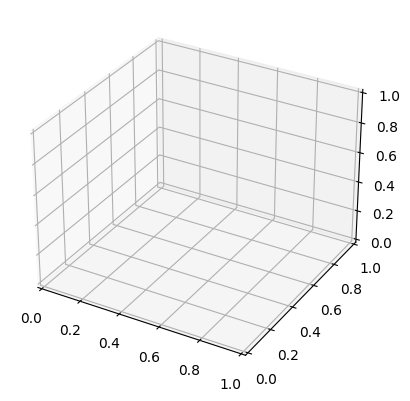

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [36]:
frame = 0

In [37]:
# Plot each joint in the chosen frame
for joint in range(joints):
    x, y, z = data[frame, joint]
    ax.scatter(x, y, z, c='b', marker='o')

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to plot the skeleton
def plot_skeleton(joints, ax, c):
    # Define the connections between joints
    skeleton_connections = [
        ('pelvis', 'spine1'),('pelvis', 'right_hip'), ('pelvis','left_hip'), ('spine1', 'spine2'), ('spine2', 'spine3'), ('spine3', 'neck'),
        ('neck', 'head'), ('spine3', 'left_collar'), ('spine3', 'right_collar'),
        ('left_collar', 'left_shoulder'), ('right_collar', 'right_shoulder'),
        ('left_shoulder', 'left_elbow'), ('right_shoulder', 'right_elbow'),
        ('left_elbow', 'left_wrist'), ('right_elbow', 'right_wrist'),
        ('left_hip', 'left_knee'), ('right_hip', 'right_knee'),
        ('left_knee', 'left_ankle'), ('right_knee', 'right_ankle'),
        ('left_ankle', 'left_foot'), ('right_ankle', 'right_foot'),
        ('head', 'jaw'), ('jaw', 'left_eye_smplhf'), ('jaw', 'right_eye_smplhf'),
        ('left_wrist', 'left_thumb1'), ('left_wrist', 'left_index1'), ('left_wrist', 'left_middle1'),
        ('left_wrist', 'left_ring1'), ('left_wrist', 'left_pinky1'),
        ('right_wrist', 'right_thumb1'), ('right_wrist', 'right_index1'), ('right_wrist', 'right_middle1'),
        ('right_wrist', 'right_ring1'), ('right_wrist', 'right_pinky1'), ('left_thumb1', 'left_thumb2'),
        ('left_index1', 'left_index2'), ('left_middle1', 'left_middle2'), ('left_ring1', 'left_ring2'),
        ('left_pinky1', 'left_pinky2'), ('right_thumb1', 'right_thumb2'), ('right_index1', 'right_index2'),
        ('right_middle1', 'right_middle2'), ('right_ring1', 'right_ring2'), ('right_pinky1', 'right_pinky2'),
        ('left_thumb2', 'left_thumb3'), ('left_index2', 'left_index3'), ('left_middle2', 'left_middle3'),
        ('left_ring2', 'left_ring3'), ('left_pinky2', 'left_pinky3'), ('right_thumb2', 'right_thumb3'),
        ('right_index2', 'right_index3'), ('right_middle2', 'right_middle3'), ('right_ring2', 'right_ring3'),
        ('right_pinky2', 'right_pinky3')
    ]
    

    # Convert joint names to indices
    joint_indices = {name: i for i, name in enumerate(joint_names)}

    for joint1_name, joint2_name in skeleton_connections:
        joint1_index = joint_indices[joint1_name]
        joint2_index = joint_indices[joint2_name]

        joint1 = joints[joint1_index]
        joint2 = joints[joint2_index]

        ax.plot([joint1[0], joint2[0]], [joint1[1], joint2[1]], [joint1[2], joint2[2]], color=c)

# Example data
T = data.shape[0]  # Number of frames
joints_data = data  # Replace this with your actual data
joints_data_cond = data_cond

# List of joint names
joint_names = [
    'pelvis', 'left_hip', 'right_hip', 'spine1', 'left_knee', 'right_knee',
    'spine2', 'left_ankle', 'right_ankle', 'spine3', 'left_foot', 'right_foot',
    'neck', 'left_collar', 'right_collar', 'head', 'left_shoulder',
    'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist',
    'jaw', 'left_eye_smplhf', 'right_eye_smplhf', 'left_index1', 'left_index2',
    'left_index3', 'left_middle1', 'left_middle2', 'left_middle3',
    'left_pinky1', 'left_pinky2', 'left_pinky3', 'left_ring1', 'left_ring2',
    'left_ring3', 'left_thumb1', 'left_thumb2', 'left_thumb3', 'right_index1',
    'right_index2', 'right_index3', 'right_middle1', 'right_middle2',
    'right_middle3', 'right_pinky1', 'right_pinky2', 'right_pinky3',
    'right_ring1', 'right_ring2', 'right_ring3', 'right_thumb1',
    'right_thumb2', 'right_thumb3'
]


In [66]:
type(joints_data)

numpy.ndarray

In [67]:
def plot_frame(t):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot joints
    ax.scatter(joints_data[t, :, 0], joints_data[t, :, 1], joints_data[t, :, 2], c='r')
    ax.scatter(joints_data_cond[t, :, 0], joints_data_cond[t, :, 1], joints_data_cond[t, :, 2], c='b')
    
    # Plot skeleton
    plot_skeleton(joints_data[t], ax, 'r')
    plot_skeleton(joints_data_cond[t], ax, 'b')

    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Skeleton Visualization - Frame {t+1}')

    xmin = np.min(joints_data[:, :, 0])
    xmin = min(xmin, np.min(joints_data_cond[:, :, 0]))
    xmax = np.max(joints_data[:, :, 0])
    xmax = max(xmax, np.max(joints_data_cond[:, :, 0]))
    ymin = np.min(joints_data[:, :, 1])
    ymin = min(ymin, np.min(joints_data_cond[:, :, 1]))
    ymax = np.max(joints_data[:, :, 1])
    ymax = max(ymax, np.max(joints_data_cond[:, :, 1]))
    zmin = np.min(joints_data[:, :, 2])
    zmin = min(zmin, np.min(joints_data_cond[:, :, 2]))
    zmax = np.max(joints_data[:, :, 2])
    zmax = max(zmax, np.max(joints_data_cond[:, :, 2]))

    # Set fixed axis limits
    ax.set_xlim([xmin, xmax])  # Adjust xmin and xmax according to your data
    ax.set_ylim([ymin, ymax])  # Adjust ymin and ymax according to your data
    ax.set_zlim([zmin, zmax])  # Adjust zmin and zmax according to your data


    # Show plot
    plt.show()

In [68]:
ipywidgets.interact(plot_frame, t=IntSlider(min=0, max=data.shape[0]-1, step=1))

interactive(children=(IntSlider(value=0, description='t', max=1979), Output()), _dom_classes=('widget-interact…

<function __main__.plot_frame(t)>

In [69]:
ipywidgets.interact(plot_frame, t=ipywidgets.Play(min=0, max=data.shape[0]-1, step=1, interval=20))

interactive(children=(Play(value=0, description='t', interval=20, max=1979), Output()), _dom_classes=('widget-…

<function __main__.plot_frame(t)>

### Making left right connections

In [43]:
skeleton_connections = [
        ('pelvis', 'spine1'),('pelvis', 'right_hip'), ('pelvis','left_hip'), ('spine1', 'spine2'), ('spine2', 'spine3'), ('spine3', 'neck'),
        ('neck', 'head'), ('spine3', 'left_collar'), ('spine3', 'right_collar'),
        ('left_collar', 'left_shoulder'), ('right_collar', 'right_shoulder'),
        ('left_shoulder', 'left_elbow'), ('right_shoulder', 'right_elbow'),
        ('left_elbow', 'left_wrist'), ('right_elbow', 'right_wrist'),
        ('left_hip', 'left_knee'), ('right_hip', 'right_knee'),
        ('left_knee', 'left_ankle'), ('right_knee', 'right_ankle'),
        ('left_ankle', 'left_foot'), ('right_ankle', 'right_foot'),
        ('head', 'jaw'), ('jaw', 'left_eye_smplhf'), ('jaw', 'right_eye_smplhf'),
        ('left_wrist', 'left_thumb1'), ('left_wrist', 'left_index1'), ('left_wrist', 'left_middle1'),
        ('left_wrist', 'left_ring1'), ('left_wrist', 'left_pinky1'),
        ('right_wrist', 'right_thumb1'), ('right_wrist', 'right_index1'), ('right_wrist', 'right_middle1'),
        ('right_wrist', 'right_ring1'), ('right_wrist', 'right_pinky1'), ('left_thumb1', 'left_thumb2'),
        ('left_index1', 'left_index2'), ('left_middle1', 'left_middle2'), ('left_ring1', 'left_ring2'),
        ('left_pinky1', 'left_pinky2'), ('right_thumb1', 'right_thumb2'), ('right_index1', 'right_index2'),
        ('right_middle1', 'right_middle2'), ('right_ring1', 'right_ring2'), ('right_pinky1', 'right_pinky2'),
        ('left_thumb2', 'left_thumb3'), ('left_index2', 'left_index3'), ('left_middle2', 'left_middle3'),
        ('left_ring2', 'left_ring3'), ('left_pinky2', 'left_pinky3'), ('right_thumb2', 'right_thumb3'),
        ('right_index2', 'right_index3'), ('right_middle2', 'right_middle3'), ('right_ring2', 'right_ring3'),
        ('right_pinky2', 'right_pinky3')
    ]

In [44]:
joint_names = [
    'pelvis', 'left_hip', 'right_hip', 'spine1', 'left_knee', 'right_knee',
    'spine2', 'left_ankle', 'right_ankle', 'spine3', 'left_foot', 'right_foot',
    'neck', 'left_collar', 'right_collar', 'head', 'left_shoulder',
    'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist',
    'jaw', 'left_eye_smplhf', 'right_eye_smplhf', 'left_index1', 'left_index2',
    'left_index3', 'left_middle1', 'left_middle2', 'left_middle3',
    'left_pinky1', 'left_pinky2', 'left_pinky3', 'left_ring1', 'left_ring2',
    'left_ring3', 'left_thumb1', 'left_thumb2', 'left_thumb3', 'right_index1',
    'right_index2', 'right_index3', 'right_middle1', 'right_middle2',
    'right_middle3', 'right_pinky1', 'right_pinky2', 'right_pinky3',
    'right_ring1', 'right_ring2', 'right_ring3', 'right_thumb1',
    'right_thumb2', 'right_thumb3'
]

In [70]:
right = []
left = []
for conn in skeleton_connections:
    j1, j2 = conn
    if 'right' in j1 or 'right' in j2:
        right.append(conn)
    if 'left' in j1 or 'left' in j2:
        left.append(conn)

for i in range(len(right)):
    j1,j2 = right[i]
    j1_index = joint_names.index(j1)
    j2_index = joint_names.index(j2)
    right[i] = (j1_index, j2_index)

for i in range(len(left)):
    j1,j2 = left[i]
    j1_index = joint_names.index(j1)
    j2_index = joint_names.index(j2)
    left[i] = (j1_index, j2_index)

In [71]:
right

[(0, 2),
 (9, 14),
 (14, 17),
 (17, 19),
 (19, 21),
 (2, 5),
 (5, 8),
 (8, 11),
 (22, 24),
 (21, 52),
 (21, 40),
 (21, 43),
 (21, 49),
 (21, 46),
 (52, 53),
 (40, 41),
 (43, 44),
 (49, 50),
 (46, 47),
 (53, 54),
 (41, 42),
 (44, 45),
 (50, 51),
 (47, 48)]

In [72]:
left

[(0, 1),
 (9, 13),
 (13, 16),
 (16, 18),
 (18, 20),
 (1, 4),
 (4, 7),
 (7, 10),
 (22, 23),
 (20, 37),
 (20, 25),
 (20, 28),
 (20, 34),
 (20, 31),
 (37, 38),
 (25, 26),
 (28, 29),
 (34, 35),
 (31, 32),
 (38, 39),
 (26, 27),
 (29, 30),
 (35, 36),
 (32, 33)]

In [5]:
import torch.nn as nn
import torch

In [2]:
class SinusoidalEmbedding2D(nn.Module):
    def __init__(self, num_channels, max_positions=10000, endpoint=False):
        """SinusoidalEmbedding2D applies a 2d sinusoidal positional encoding 

        Parameters
        ----------
        num_channels : int
            number of input channels
        max_positions : int, optional
            maximum positions to encode, by default 10000
        endpoint : bool, optional
            whether to set endpoint, by default False
        """
        super().__init__()
        self.num_channels = num_channels
        self.max_positions = max_positions
        self.endpoint = endpoint

    def forward(self, x):
        freqs = torch.arange(
            start=0, end=self.num_channels // 2, dtype=torch.float32, device=x.device
        )
        freqs = freqs / (self.num_channels // 2 - (1 if self.endpoint else 0))
        freqs = (1 / self.max_positions) ** freqs
        x = x.ger(freqs.to(x.dtype))
        x = torch.cat([x.cos(), x.sin()], dim=1)
        return x

In [3]:
embedding = SinusoidalEmbedding2D(10, 1000)

In [8]:
inp = torch.rand(10, 1000)

In [9]:
out = embedding(inp)

In [ ]:
import numpy as np
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
from timeit import default_timer
import torch.nn.functional as F
import random
from utils.gaussian_random_field import *
from utils.visualizations import *
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
import gc

train_mean = torch.from_numpy(np.load('data/data_more_processing/train_mean.npy')).to('cuda:0')
train_std = torch.from_numpy(np.load('data/data_more_processing/train_std.npy')).to('cuda:0')

writer = SummaryWriter("/scratch/gilbreth/anugu/logs_demo/demo_6_models_overfit_one_point_v1")

def calculate_gradient_penalty(model, real_images,c, fake_images,cf, device, res):
    """Calculates the gradient penalty loss for WGAN GRF"""
    # Random weight term for interpolation between real and fake data
    alpha = torch.randn((real_images.size(0),1, 1), device=device)
    # Get random interpolation between real and fake data
    interpolates = (alpha * real_images + ((1 - alpha) * fake_images)).requires_grad_(True)
    #print(real_images.shape,c.shape,fake_images.shape, interpolates.shape)

    model_interpolates = model(interpolates.float(),c.requires_grad_(True))
    grad_outputs = torch.ones(model_interpolates.size(), device=device, requires_grad=False)

    # Get gradient w.r.t. interpolates
    gradients = torch.autograd.grad(
        outputs=model_interpolates,
        inputs=(interpolates,c),
        grad_outputs=grad_outputs,
        create_graph=True,
        retain_graph=True,
        only_inputs=True,
    )

    gradients_x = gradients[0].reshape(gradients[0].shape[0], -1)
    gradients_c = gradients[1].reshape(gradients[1].shape[0], -1)

    gradient_penalty = torch.mean(((gradients_x.norm(2, dim=1)**2+gradients_c.norm(2, dim=1)**2)**0.5 - 1/np.sqrt(res*res)) ** 2) 
    return gradient_penalty

def convert_to_axis_angle(data):
    '''data [T, 242]'''
    axis_magnitude = data[:, 6:226].reshape(-1, 55, 4)
    axis = axis_magnitude[:, :, :3]
    magnitude = axis_magnitude[:, :, 3:]
    poses = axis * (magnitude+1e-10)
    poses = poses.reshape(axis_magnitude.shape[0], -1)
    new_data = torch.cat([data[:, :6], poses, data[:, 226:]], axis=1)
    return new_data

def human_loss_3d(data):
    ''' data is of shape (N, T, J, 3) '''
    right = [(0, 2),(9, 14),(14, 17),(17, 19),(19, 21),(2, 5),(5, 8),(8, 11),(22, 24)
            ,(21, 52),(21, 40),(21, 43),(21, 49),(21, 46),(52, 53),(40, 41),(43, 44),
            (49, 50),(46, 47),(53, 54),(41, 42),(44, 45),(50, 51),(47, 48)]

    left = [(0, 1), (9, 13),(13, 16),(16, 18),(18, 20),(1, 4),(4, 7),(7, 10),
            (22, 23),(20, 37),(20, 25),(20, 28),(20, 34),(20, 31),(37, 38),
            (25, 26),(28, 29),(34, 35),(31, 32),(38, 39),(26, 27),(29, 30),
            (35, 36),(32, 33)]

    error = 0

    for i in range(len(right)):
        error+=(torch.norm(data[:,:,right[i][0],:] - data[:,:,right[i][1],:])\
             - torch.norm(data[:,:,left[i][0],:] - data[:,:,left[i][1],:]))**2
    return error

def unnormalize_data(data, mean=train_mean, std=train_std):
    ''' data: [T, 187]'''
    return data * (std+1e-10) + mean

def human_loss(data):
    ''' data is of (N, T, 242) tensor, in normalized axis-magnitude form'''
    axis_angle_data = torch.stack([convert_to_axis_angle(point) for point in data])
    unnormalized_axis_angle_data = unnormalize_data(axis_angle_data)
    pos_3d_data = torch.stack([smplx_to_pos3d_torch(point) for point in unnormalized_axis_angle_data]).reshape(axis_angle_data.shape[0], axis_angle_data.shape[1], 55, 3)
    return human_loss_3d(pos_3d_data)

def foot_contact_loss(data):
    ''' data is of (N, T, 242) tensor, in normalized axis-magnitude form'''
    axis_angle_data = torch.stack([convert_to_axis_angle(point) for point in data])
    unnormalized_axis_angle_data = unnormalize_data(axis_angle_data)
    pos_3d_data = torch.stack([smplx_to_pos3d_torch(point) for point in unnormalized_axis_angle_data]).reshape(axis_angle_data.shape[0], axis_angle_data.shape[1], 55, 3) # (N, T, 55, 3)
    left_foot = pos_3d_data[:, :, 10, 2] # (T, 3)
    right_foot = pos_3d_data[:, :, 11, 2] # (T, 3)
    loss = ((left_foot-0)**2 + (right_foot-0)**2).mean()
    return loss
    
def balance_loss(input, generated):
    '''input: (N, T, 242), generated: (N, T, 242)'''
    axis_angle_input = torch.stack([convert_to_axis_angle(point) for point in input])
    axis_angle_generated = torch.stack([convert_to_axis_angle(point) for point in generated])

    unnormalized_axis_angle_input = unnormalize_data(axis_angle_input)
    unnormalized_axis_angle_generated = unnormalize_data(axis_angle_generated)

    pos_3d_input = torch.stack([smplx_to_pos3d_torch(point) for point in unnormalized_axis_angle_input]).reshape(axis_angle_input.shape[0], axis_angle_input.shape[1], 55, 3)
    pos_3d_generated = torch.stack([smplx_to_pos3d_torch(point) for point in unnormalized_axis_angle_generated]).reshape(axis_angle_generated.shape[0], axis_angle_generated.shape[1], 55, 3)

    left_foot_input = pos_3d_input[:, :, 10, 2] # (N, T)
    right_foot_input = pos_3d_input[:, :, 11, 2] # (N, T)

    ground_level = min(left_foot_input.min(), right_foot_input.min())

    left_foot_generated = pos_3d_generated[:, :, 10, 2] # (N, T)
    right_foot_generated = pos_3d_generated[:, :, 11, 2] # (N, T)

    contact_loss = ((left_foot_generated-ground_level)**2 + (right_foot_generated-ground_level)**2).mean()

    pos_3d_generated_pelvis = pos_3d_generated[:, :, 0, :].reshape(-1, 3) # (N*T, 3)
    pos_3d_generated_neck = pos_3d_generated[:, :, 12, :].reshape(-1, 3) # (N*T, 3)
    magnitude = torch.linalg.norm(pos_3d_generated_neck-pos_3d_generated_pelvis, dim=1) # (N*T, 1)
    difference = pos_3d_generated_neck[:, 2]- pos_3d_generated_pelvis[:, 2] # (N*T, 1)
    dot_product = difference/magnitude # (N*T, 1)

    dot_product_loss = ((dot_product-1)**2).mean()

    return contact_loss + dot_product_loss

def seperate_data(data):
    '''data is (N, T, 242)'''
    move = data[:, :, :3]
    orient = data[:, :, 3:6]
    betas = data[:, :, 226:242]
    
    poses = data[:, :, 6:226]

    hands = torch.cat([poses[:, :, 4*13:4*15], poses[:, :, 4*16:4*22], poses[:, :, 4*25:4*54], poses[:, :, 36:42], poses[:, :, 48:54]], axis=2)

def train_GANO_HM_two_stage_copy_copy_copy(D_move, D_orient, D_betas, D_hands, D_legs, D_torso,
                                           G_move, G_orient, G_betas, G_hands, G_legs, G_torso,
                                            train_dataloader, val_dataloader, epochs, D_move_optimizer, D_orient_optimizer, D_betas_optimizer, D_hands_optimizer, D_legs_optimizer, D_torso_optimizer,
                                            G_move_optimizer, G_orient_optimizer, G_betas_optimizer, G_hands_optimizer, G_legs_optimizer, G_torso_optimizer,
                                            λ_grad, grf, n_critic, device, batch_size, logging, hm_weight, fc_weight, gt_weight,
                                            D_move_scheduler, D_orient_scheduler, D_betas_scheduler, D_hands_scheduler, D_legs_scheduler, D_torso_scheduler,
                                            G_move_scheduler, G_orient_scheduler, G_betas_scheduler, G_hands_scheduler, G_legs_scheduler, G_torso_scheduler, 
                                            data_stats = None, scheduler=None):

    losses_D_move = np.zeros(epochs)
    losses_G_move = np.zeros(epochs)
    losses_W_move = np.zeros(epochs)
    losses_MSE_move = np.zeros(epochs)
    losses_V_MSE_move = np.zeros(epochs)
    
    losses_D_orient = np.zeros(epochs)
    losses_G_orient = np.zeros(epochs)
    losses_W_orient = np.zeros(epochs)
    losses_MSE_orient = np.zeros(epochs)
    losses_V_MSE_orient = np.zeros(epochs)

    losses_D_betas = np.zeros(epochs)
    losses_G_betas = np.zeros(epochs)
    losses_W_betas = np.zeros(epochs)
    losses_MSE_betas = np.zeros(epochs)
    losses_V_MSE_betas = np.zeros(epochs)

    losses_D_hands = np.zeros(epochs)
    losses_G_hands = np.zeros(epochs)
    losses_W_hands = np.zeros(epochs)
    losses_MSE_hands = np.zeros(epochs)
    losses_V_MSE_hands = np.zeros(epochs)

    losses_D_legs = np.zeros(epochs)
    losses_G_legs = np.zeros(epochs)
    losses_W_legs = np.zeros(epochs)
    losses_MSE_legs = np.zeros(epochs)
    losses_V_MSE_legs = np.zeros(epochs)

    losses_D_torso = np.zeros(epochs)
    losses_G_torso = np.zeros(epochs)
    losses_W_torso = np.zeros(epochs)
    losses_MSE_torso = np.zeros(epochs)
    losses_V_MSE_torso = np.zeros(epochs)

    no_of_batches = len(train_dataloader)

    losses_MSE_full = np.zeros(epochs)
    losses_V_MSE_full = np.zeros(epochs)

    for i in tqdm(range(epochs)):
        loss_D_move = 0.0
        loss_G_move = 0.0
        loss_W_move = 0.0
        loss_MSE_move = 0.0
        loss_V_MSE_move = 0.0

        loss_D_orient = 0.0
        loss_G_orient = 0.0
        loss_W_orient = 0.0
        loss_MSE_orient = 0.0
        loss_V_MSE_orient = 0.0

        loss_D_betas = 0.0
        loss_G_betas = 0.0
        loss_W_betas = 0.0
        loss_MSE_betas = 0.0
        loss_V_MSE_betas = 0.0

        loss_D_hands = 0.0
        loss_G_hands = 0.0
        loss_W_hands = 0.0
        loss_MSE_hands = 0.0
        loss_V_MSE_hands = 0.0

        loss_D_legs = 0.0
        loss_G_legs = 0.0
        loss_W_legs = 0.0
        loss_MSE_legs = 0.0
        loss_V_MSE_legs = 0.0

        loss_D_torso = 0.0
        loss_G_torso = 0.0
        loss_W_torso = 0.0
        loss_MSE_torso = 0.0
        loss_V_MSE_torso = 0.0

        loss_MSE_full = 0.0
        loss_V_MSE_full = 0.0

        for j, data in tqdm(enumerate(train_dataloader)):

            if random.random()<0.5:
                x = data[0].to(device).float()
                c = data[1].to(device).float()

                x_move, x_orient, x_betas, x_hands, x_legs, x_torso = seperate_data(x)
                c_move, c_orient, c_betas, c_hands, c_legs, c_torso = seperate_data(c)

            else:
                x = data[1].to(device).float()
                c = data[0].to(device).float()

                x_move, x_orient, x_betas, x_hands, x_legs, x_torso = seperate_data(x)
                c_move, c_orient, c_betas, c_hands, c_legs, c_torso = seperate_data(c)

            #-------- Training D_move --------#

            x_move = x_move.reshape(x_move.shape[0], x_move.shape[1], -1)
            c_move = c_move.reshape(c_move.shape[0], c_move.shape[1], -1)

            x_syn_move, loss_D, loss_W = train_discriminator(x_move, c_move, D_move, G_move, D_move_optimizer, D_move_scheduler, λ_grad, grf, device)
            loss_D_move += loss_D
            loss_W_move += loss_W

            #-------- Training D_orient --------#

            x_orient = x_orient.reshape(x_orient.shape[0], x_orient.shape[1], -1)
            c_orient = c_orient.reshape(c_orient.shape[0], c_orient.shape[1], -1)

            x_syn_orient, loss_D, loss_W = train_discriminator(x_orient, c_orient, D_orient, G_orient, D_orient_optimizer, D_orient_scheduler, λ_grad, grf, device)
            loss_D_orient += loss_D
            loss_W_orient += loss_W

            #-------- Training D_betas --------#

            x_betas = x_betas.reshape(x_betas.shape[0], x_betas.shape[1], -1)
            c_betas = c_betas.reshape(c_betas.shape[0], c_betas.shape[1], -1)

            x_syn_betas, loss_D, loss_W = train_discriminator(x_betas, c_betas, D_betas, G_betas, D_betas_optimizer, D_betas_scheduler, λ_grad, grf, device)
            loss_D_betas += loss_D
            loss_W_betas += loss_W

            #-------- Training D_hands --------#

            x_hands = x_hands.reshape(x_hands.shape[0], x_hands.shape[1], -1)
            c_hands = c_hands.reshape(c_hands.shape[0], c_hands.shape[1], -1)

            x_syn_hands, loss_D, loss_W = train_discriminator(x_hands, c_hands, D_hands, G_hands, D_hands_optimizer, D_hands_scheduler, λ_grad, grf, device)
            loss_D_hands += loss_D
            loss_W_hands += loss_W

            #-------- Training D_legs --------#

            x_legs = x_legs.reshape(x_legs.shape[0], x_legs.shape[1], -1)
            c_legs = c_legs.reshape(c_legs.shape[0], c_legs.shape[1], -1)

            x_syn_legs, loss_D, loss_W = train_discriminator(x_legs, c_legs, D_legs, G_legs, D_legs_optimizer, D_legs_scheduler, λ_grad, grf, device)
            loss_D_legs += loss_D
            loss_W_legs += loss_W

            #-------- Training D_torso --------#

            x_torso = x_torso.reshape(x_torso.shape[0], x_torso.shape[1], -1)
            c_torso = c_torso.reshape(c_torso.shape[0], c_torso.shape[1], -1)

            x_syn_torso, loss_D, loss_W = train_discriminator(x_torso, c_torso, D_torso, G_torso, D_torso_optimizer, D_torso_scheduler, λ_grad, grf, device)
            loss_D_torso += loss_D
            loss_W_torso += loss_W

            x_syn_full = combine_data(x_syn_move, x_syn_orient, x_syn_betas, x_syn_hands, x_syn_legs, x_syn_torso)
            
            
            #-------- Train Generators --------#
            if (j + 1) % n_critic == 0:
                #-------- Training G_move --------#

                x_syn_move, loss_G = train_generator(x_move, c_move, G_move, G_move_optimizer, G_move_scheduler, gt_weight, grf)
                loss_G_move += loss_G

                #-------- Training G_orient --------#

                x_syn_orient, loss_G = train_generator(x_orient, c_orient, G_orient, G_orient_optimizer, G_orient_scheduler, gt_weight, grf)
                loss_G_orient += loss_G

                #-------- Training G_betas --------#

                x_syn_betas, loss_G = train_generator(x_betas, c_betas, G_betas, G_betas_optimizer, G_betas_scheduler, gt_weight, grf)
                loss_G_betas += loss_G

                #-------- Training G_hands --------#

                x_syn_hands, loss_G = train_generator(x_hands, c_hands, G_hands, G_hands_optimizer, G_hands_scheduler, gt_weight, grf)
                loss_G_hands += loss_G

                #-------- Training G_legs --------#

                x_syn_legs, loss_G = train_generator(x_legs, c_legs, G_legs, G_legs_optimizer, G_legs_scheduler, gt_weight, grf)
                loss_G_legs += loss_G

                #-------- Training G_torso --------#

                x_syn_torso, loss_G = train_generator(x_torso, c_torso, G_torso, G_torso_optimizer, G_torso_scheduler, gt_weight, grf)
                loss_G_torso += loss_G

            loss_MSE_move += F.mse_loss(x_syn_move, x_move)
            loss_MSE_orient += F.mse_loss(x_syn_orient, x_orient)
            loss_MSE_betas += F.mse_loss(x_syn_betas, x_betas)
            loss_MSE_hands += F.mse_loss(x_syn_hands, x_hands)
            loss_MSE_legs += F.mse_loss(x_syn_legs, x_legs)
            loss_MSE_torso += F.mse_loss(x_syn_torso, x_torso)
            loss_MSE_full += (F.mse_loss(x_syn_move, x_move) + F.mse_loss(x_syn_orient, x_orient) + F.mse_loss(x_syn_betas, x_betas) + F.mse_loss(x_syn_hands, x_hands) + F.mse_loss(x_syn_legs, x_legs) + F.mse_loss(x_syn_torso, x_torso))/6

            del x, c, x_move, c_move, x_orient, c_orient, x_betas, c_betas, x_hands, c_hands, x_legs, c_legs, x_torso, c_torso
            del x_syn_move, x_syn_orient, x_syn_betas, x_syn_hands, x_syn_legs, x_syn_torso, x_syn_full
            gc.collect()
            torch.cuda.empty_cache()
        
        with torch.no_grad():
            no_of_val_batches = len(val_dataloader)
            for j, data in enumerate(val_dataloader):
                x = data[0].to(device).float()
                c = data[1].to(device).float()

                x_move, x_orient, x_betas, x_hands, x_legs, x_torso = seperate_data(x)
                c_move, c_orient, c_betas, c_hands, c_legs, c_torso = seperate_data(c)

                x_move = x_move.reshape(x_move.shape[0], x_move.shape[1], -1)
                c_move = c_move.reshape(c_move.shape[0], c_move.shape[1], -1)

                x_orient = x_orient.reshape(x_orient.shape[0], x_orient.shape[1], -1)
                c_orient = c_orient.reshape(c_orient.shape[0], c_orient.shape[1], -1)

                x_betas = x_betas.reshape(x_betas.shape[0], x_betas.shape[1], -1)
                c_betas = c_betas.reshape(c_betas.shape[0], c_betas.shape[1], -1)

                x_hands = x_hands.reshape(x_hands.shape[0], x_hands.shape[1], -1)
                c_hands = c_hands.reshape(c_hands.shape[0], c_hands.shape[1], -1)

                x_legs = x_legs.reshape(x_legs.shape[0], x_legs.shape[1], -1)
                c_legs = c_legs.reshape(c_legs.shape[0], c_legs.shape[1], -1)

                x_torso = x_torso.reshape(x_torso.shape[0], x_torso.shape[1], -1)
                c_torso = c_torso.reshape(c_torso.shape[0], c_torso.shape[1], -1)

                x_syn_move = G_move(grf.sample(x_move.shape[0], x_move.shape[1]).float(),c_move)
                x_syn_orient = G_orient(grf.sample(x_orient.shape[0], x_orient.shape[1]).float(),c_orient)
                x_syn_betas = G_betas(grf.sample(x_betas.shape[0], x_betas.shape[1]).float(),c_betas)
                x_syn_hands = G_hands(grf.sample(x_hands.shape[0], x_hands.shape[1]).float(),c_hands)
                x_syn_legs = G_legs(grf.sample(x_legs.shape[0], x_legs.shape[1]).float(),c_legs)
                x_syn_torso = G_torso(grf.sample(x_torso.shape[0], x_torso.shape[1]).float(),c_torso)
                x_syn_full = combine_data(x_syn_move, x_syn_orient, x_syn_betas, x_syn_hands, x_syn_legs, x_syn_torso)

                loss_V_MSE_move += F.mse_loss(x_syn_move, x_move)
                loss_V_MSE_orient += F.mse_loss(x_syn_orient, x_orient)
                loss_V_MSE_betas += F.mse_loss(x_syn_betas, x_betas)
                loss_V_MSE_hands += F.mse_loss(x_syn_hands, x_hands)
                loss_V_MSE_legs += F.mse_loss(x_syn_legs, x_legs)
                loss_V_MSE_torso += F.mse_loss(x_syn_torso, x_torso)
                loss_V_MSE_full += (F.mse_loss(x_syn_move, x_move) + F.mse_loss(x_syn_orient, x_orient) + F.mse_loss(x_syn_betas, x_betas) + F.mse_loss(x_syn_hands, x_hands) + F.mse_loss(x_syn_legs, x_legs) + F.mse_loss(x_syn_torso, x_torso))/6

                loss_V_MSE_transl += F.mse_loss(x_syn_transl, x_transl)
                loss_V_MSE_poses += F.mse_loss(x_syn_poses,x_pose)
                loss_V_MSE_full += (F.mse_loss(x_syn_transl, x_transl)  + F.mse_loss(x_syn_poses,x_pose))/2

                del x, c, x_move, c_move, x_orient, c_orient, x_betas, c_betas, x_hands, c_hands, x_legs, c_legs, x_torso, c_torso
                del x_syn_move, x_syn_orient, x_syn_betas, x_syn_hands, x_syn_legs, x_syn_torso, x_syn_full
                gc.collect()
                torch.cuda.empty_cache()
        
        losses_G_move[i] = loss_G_move / (no_of_batches/n_critic)
        losses_MSE_move[i] = loss_MSE_move/ no_of_batches
        losses_V_MSE_move[i] =  loss_V_MSE_move/ no_of_val_batches

        losses_G_orient[i] = loss_G_orient / (no_of_batches/n_critic)
        losses_MSE_orient[i] = loss_MSE_orient/ no_of_batches
        losses_V_MSE_orient[i] =  loss_V_MSE_orient/ no_of_val_batches

        losses_G_betas[i] = loss_G_betas / (no_of_batches/n_critic)
        losses_MSE_betas[i] = loss_MSE_betas/ no_of_batches
        losses_V_MSE_betas[i] =  loss_V_MSE_betas/ no_of_val_batches

        losses_G_hands[i] = loss_G_hands / (no_of_batches/n_critic)
        losses_MSE_hands[i] = loss_MSE_hands/ no_of_batches
        losses_V_MSE_hands[i] =  loss_V_MSE_hands/ no_of_val_batches

        losses_G_legs[i] = loss_G_legs / (no_of_batches/n_critic)
        losses_MSE_legs[i] = loss_MSE_legs/ no_of_batches
        losses_V_MSE_legs[i] =  loss_V_MSE_legs/ no_of_val_batches

        losses_G_torso[i] = loss_G_torso / (no_of_batches/n_critic)
        losses_MSE_torso[i] = loss_MSE_torso/ no_of_batches
        losses_V_MSE_torso[i] =  loss_V_MSE_torso/ no_of_val_batches

        losses_MSE_full[i] = loss_MSE_full/ no_of_batches
        losses_V_MSE_full[i] = loss_V_MSE_full/ no_of_val_batches

        # Add to tensorboard.
        writer.add_scalar('losses_G_move', losses_G_move[i], i)
        writer.add_scalar('losses_MSE_move', losses_MSE_move[i], i)
        writer.add_scalar('losses_V_MSE_move', losses_V_MSE_move[i], i)

        writer.add_scalar('losses_G_orient', losses_G_orient[i], i)
        writer.add_scalar('losses_MSE_orient', losses_MSE_orient[i], i)
        writer.add_scalar('losses_V_MSE_orient', losses_V_MSE_orient[i], i)

        writer.add_scalar('losses_G_betas', losses_G_betas[i], i)
        writer.add_scalar('losses_MSE_betas', losses_MSE_betas[i], i)
        writer.add_scalar('losses_V_MSE_betas', losses_V_MSE_betas[i], i)

        writer.add_scalar('losses_G_hands', losses_G_hands[i], i)
        writer.add_scalar('losses_MSE_hands', losses_MSE_hands[i], i)
        writer.add_scalar('losses_V_MSE_hands', losses_V_MSE_hands[i], i)

        writer.add_scalar('losses_G_legs', losses_G_legs[i], i)
        writer.add_scalar('losses_MSE_legs', losses_MSE_legs[i], i)
        writer.add_scalar('losses_V_MSE_legs', losses_V_MSE_legs[i], i)

        writer.add_scalar('losses_G_torso', losses_G_torso[i], i)
        writer.add_scalar('losses_MSE_torso', losses_MSE_torso[i], i)
        writer.add_scalar('losses_V_MSE_torso', losses_V_MSE_torso[i], i)

        writer.add_scalar('loss_MSE_full', losses_MSE_full[i], i)
        writer.add_scalar('loss_V_MSE_full', losses_V_MSE_full[i], i)

        if i%100==0:
            torch.save(G_move.state_dict(), logging['G_move_save_path']+f"generator_move_epoch{i}.pt")
            torch.save(G_orient.state_dict(), logging['G_orient_save_path']+f"generator_orient_epoch{i}.pt")
            torch.save(G_betas.state_dict(), logging['G_betas_save_path']+f"generator_betas_epoch{i}.pt")
            torch.save(G_hands.state_dict(), logging['G_hands_save_path']+f"generator_hands_epoch{i}.pt")
            torch.save(G_legs.state_dict(), logging['G_legs_save_path']+f"generator_legs_epoch{i}.pt")
            torch.save(G_torso.state_dict(), logging['G_torso_save_path']+f"generator_torso_epoch{i}.pt")

            torch.save(G_move_optimizer.state_dict(), logging['G_move_optimizer_save_path']+f"epoch{i}.pt")
            torch.save(G_orient_optimizer.state_dict(), logging['G_orient_optimizer_save_path']+f"epoch{i}.pt")
            torch.save(G_betas_optimizer.state_dict(), logging['G_betas_optimizer_save_path']+f"epoch{i}.pt")
            torch.save(G_hands_optimizer.state_dict(), logging['G_hands_optimizer_save_path']+f"epoch{i}.pt")
            torch.save(G_legs_optimizer.state_dict(), logging['G_legs_optimizer_save_path']+f"epoch{i}.pt")
            torch.save(G_torso_optimizer.state_dict(), logging['G_torso_optimizer_save_path']+f"epoch{i}.pt")

            torch.save(torch.from_numpy(losses_G_move), logging['plots']+f"loss_G_move.pt")
            torch.save(torch.from_numpy(losses_MSE_move), logging['plots']+f"loss_MSE_move.pt")
            torch.save(torch.from_numpy(losses_V_MSE_move), logging['plots']+f"loss_V_MSE_move.pt")

            torch.save(torch.from_numpy(losses_G_orient), logging['plots']+f"loss_G_orient.pt")
            torch.save(torch.from_numpy(losses_MSE_orient), logging['plots']+f"loss_MSE_orient.pt")
            torch.save(torch.from_numpy(losses_V_MSE_orient), logging['plots']+f"loss_V_MSE_orient.pt")

            torch.save(torch.from_numpy(losses_G_betas), logging['plots']+f"loss_G_betas.pt")
            torch.save(torch.from_numpy(losses_MSE_betas), logging['plots']+f"loss_MSE_betas.pt")
            torch.save(torch.from_numpy(losses_V_MSE_betas), logging['plots']+f"loss_V_MSE_betas.pt")

            torch.save(torch.from_numpy(losses_G_hands), logging['plots']+f"loss_G_hands.pt")
            torch.save(torch.from_numpy(losses_MSE_hands), logging['plots']+f"loss_MSE_hands.pt")
            torch.save(torch.from_numpy(losses_V_MSE_hands), logging['plots']+f"loss_V_MSE_hands.pt")

            torch.save(torch.from_numpy(losses_G_legs), logging['plots']+f"loss_G_legs.pt")
            torch.save(torch.from_numpy(losses_MSE_legs), logging['plots']+f"loss_MSE_legs.pt")
            torch.save(torch.from_numpy(losses_V_MSE_legs), logging['plots']+f"loss_V_MSE_legs.pt")

            torch.save(torch.from_numpy(losses_G_torso), logging['plots']+f"loss_G_torso.pt")
            torch.save(torch.from_numpy(losses_MSE_torso), logging['plots']+f"loss_MSE_torso.pt")
            torch.save(torch.from_numpy(losses_V_MSE_torso), logging['plots']+f"loss_V_MSE_torso.pt")

            torch.save(torch.from_numpy(losses_MSE_full), logging['plots']+f"loss_MSE_full.pt")
            torch.save(torch.from_numpy(losses_V_MSE_full), logging['plots']+f"loss_V_MSE_full.pt")


        if i%100==0:
            with torch.no_grad():
                for j, data in enumerate(val_dataloader):

                    x = data[0].to(device).float()
                    c = data[1].to(device).float()

                    x_move, x_orient, x_betas, x_hands, x_legs, x_torso = seperate_data(x)
                    c_move, c_orient, c_betas, c_hands, c_legs, c_torso = seperate_data(c)

                    x_move = x_move.reshape(x_move.shape[0], x_move.shape[1], -1)
                    c_move = c_move.reshape(c_move.shape[0], c_move.shape[1], -1)

                    x_orient = x_orient.reshape(x_orient.shape[0], x_orient.shape[1], -1)
                    c_orient = c_orient.reshape(c_orient.shape[0], c_orient.shape[1], -1)

                    x_betas = x_betas.reshape(x_betas.shape[0], x_betas.shape[1], -1)
                    c_betas = c_betas.reshape(c_betas.shape[0], c_betas.shape[1], -1)

                    x_hands = x_hands.reshape(x_hands.shape[0], x_hands.shape[1], -1)
                    c_hands = c_hands.reshape(c_hands.shape[0], c_hands.shape[1], -1)

                    x_legs = x_legs.reshape(x_legs.shape[0], x_legs.shape[1], -1)
                    c_legs = c_legs.reshape(c_legs.shape[0], c_legs.shape[1], -1)

                    x_torso = x_torso.reshape(x_torso.shape[0], x_torso.shape[1], -1)
                    c_torso = c_torso.reshape(c_torso.shape[0], c_torso.shape[1], -1)

                    x_syn_move = G_move(grf.sample(x_move.shape[0], x_move.shape[1]).float(),c_move)
                    x_syn_orient = G_orient(grf.sample(x_orient.shape[0], x_orient.shape[1]).float(),c_orient)
                    x_syn_betas = G_betas(grf.sample(x_betas.shape[0], x_betas.shape[1]).float(),c_betas)
                    x_syn_hands = G_hands(grf.sample(x_hands.shape[0], x_hands.shape[1]).float(),c_hands)
                    x_syn_legs = G_legs(grf.sample(x_legs.shape[0], x_legs.shape[1]).float(),c_legs)
                    x_syn_torso = G_torso(grf.sample(x_torso.shape[0], x_torso.shape[1]).float(),c_torso)
                    x_syn_full = combine_data(x_syn_move, x_syn_orient, x_syn_betas, x_syn_hands, x_syn_legs, x_syn_torso)

                    x_axis_angle = torch.stack([convert_to_axis_angle(point) for point in x])
                    x = unnormalize_data(x_axis_angle)

                    c_axis_angle = torch.stack([convert_to_axis_angle(point) for point in c])
                    c = unnormalize_data(c_axis_angle)

                    x_syn_full_axis_angle = torch.stack([convert_to_axis_angle(point) for point in x_syn_full])
                    x_syn = unnormalize_data(x_syn_full_axis_angle)

                    print(f'plotting validation for epoch {i}')
                    vis_results(c, x, x_syn, i, logging['vis_test_results_path'], is_smplx=True)
                    break 

    final_result = {'losses_G_move': losses_G_move, 'losses_MSE_move': losses_MSE_move, 'losses_V_MSE_move': losses_V_MSE_move,
                    'losses_G_orient': losses_G_orient, 'losses_MSE_orient': losses_MSE_orient, 'losses_V_MSE_orient': losses_V_MSE_orient,
                    'losses_G_betas': losses_G_betas, 'losses_MSE_betas': losses_MSE_betas, 'losses_V_MSE_betas': losses_V_MSE_betas, 
                    'losses_G_hands': losses_G_hands, 'losses_MSE_hands': losses_MSE_hands, 'losses_V_MSE_hands': losses_V_MSE_hands, 
                    'losses_G_legs': losses_G_legs, 'losses_MSE_legs': losses_MSE_legs, 'losses_V_MSE_legs': losses_V_MSE_legs, 
                    'losses_G_torso': losses_G_torso, 'losses_MSE_torso': losses_MSE_torso, 'losses_V_MSE_torso': losses_V_MSE_torso, 
                    'losses_MSE_full': losses_MSE_full, 'losses_V_MSE_full': losses_V_MSE_full}

    return final_result

        

In [ ]:
import numpy as np
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
from timeit import default_timer
import torch.nn.functional as F
import random
from utils.gaussian_random_field import *
from utils.visualizations import *
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
import gc

train_mean = torch.from_numpy(np.load('data/data_more_processing/train_mean.npy')).to('cuda:0')
train_std = torch.from_numpy(np.load('data/data_more_processing/train_std.npy')).to('cuda:0')

writer = SummaryWriter("/scratch/gilbreth/anugu/logs_demo/demo_6_models_overfit_one_point_v1")

def calculate_gradient_penalty(model, real_images,c, fake_images,cf, device, res):
    """Calculates the gradient penalty loss for WGAN GRF"""
    # Random weight term for interpolation between real and fake data
    alpha = torch.randn((real_images.size(0),1, 1), device=device)
    # Get random interpolation between real and fake data
    interpolates = (alpha * real_images + ((1 - alpha) * fake_images)).requires_grad_(True)
    #print(real_images.shape,c.shape,fake_images.shape, interpolates.shape)

    model_interpolates = model(interpolates.float(),c.requires_grad_(True))
    grad_outputs = torch.ones(model_interpolates.size(), device=device, requires_grad=False)

    # Get gradient w.r.t. interpolates
    gradients = torch.autograd.grad(
        outputs=model_interpolates,
        inputs=(interpolates,c),
        grad_outputs=grad_outputs,
        create_graph=True,
        retain_graph=True,
        only_inputs=True,
    )

    gradients_x = gradients[0].reshape(gradients[0].shape[0], -1)
    gradients_c = gradients[1].reshape(gradients[1].shape[0], -1)

    gradient_penalty = torch.mean(((gradients_x.norm(2, dim=1)**2+gradients_c.norm(2, dim=1)**2)**0.5 - 1/np.sqrt(res*res)) ** 2) 
    return gradient_penalty

def convert_to_axis_angle(data):
    '''data [T, 242]'''
    axis_magnitude = data[:, 6:226].reshape(-1, 55, 4)
    axis = axis_magnitude[:, :, :3]
    magnitude = axis_magnitude[:, :, 3:]
    poses = axis * (magnitude+1e-10)
    poses = poses.reshape(axis_magnitude.shape[0], -1)
    new_data = torch.cat([data[:, :6], poses, data[:, 226:]], axis=1)
    return new_data

def human_loss_3d(data):
    ''' data is of shape (N, T, J, 3) '''
    right = [(0, 2),(9, 14),(14, 17),(17, 19),(19, 21),(2, 5),(5, 8),(8, 11),(22, 24)
            ,(21, 52),(21, 40),(21, 43),(21, 49),(21, 46),(52, 53),(40, 41),(43, 44),
            (49, 50),(46, 47),(53, 54),(41, 42),(44, 45),(50, 51),(47, 48)]

    left = [(0, 1), (9, 13),(13, 16),(16, 18),(18, 20),(1, 4),(4, 7),(7, 10),
            (22, 23),(20, 37),(20, 25),(20, 28),(20, 34),(20, 31),(37, 38),
            (25, 26),(28, 29),(34, 35),(31, 32),(38, 39),(26, 27),(29, 30),
            (35, 36),(32, 33)]

    error = 0

    for i in range(len(right)):
        error+=(torch.norm(data[:,:,right[i][0],:] - data[:,:,right[i][1],:])\
             - torch.norm(data[:,:,left[i][0],:] - data[:,:,left[i][1],:]))**2
    return error

def unnormalize_data(data, mean=train_mean, std=train_std):
    ''' data: [T, 187]'''
    return data * (std+1e-10) + mean

def human_loss(data):
    ''' data is of (N, T, 242) tensor, in normalized axis-magnitude form'''
    axis_angle_data = torch.stack([convert_to_axis_angle(point) for point in data])
    unnormalized_axis_angle_data = unnormalize_data(axis_angle_data)
    pos_3d_data = torch.stack([smplx_to_pos3d_torch(point) for point in unnormalized_axis_angle_data]).reshape(axis_angle_data.shape[0], axis_angle_data.shape[1], 55, 3)
    return human_loss_3d(pos_3d_data)

def foot_contact_loss(data):
    ''' data is of (N, T, 242) tensor, in normalized axis-magnitude form'''
    axis_angle_data = torch.stack([convert_to_axis_angle(point) for point in data])
    unnormalized_axis_angle_data = unnormalize_data(axis_angle_data)
    pos_3d_data = torch.stack([smplx_to_pos3d_torch(point) for point in unnormalized_axis_angle_data]).reshape(axis_angle_data.shape[0], axis_angle_data.shape[1], 55, 3) # (N, T, 55, 3)
    left_foot = pos_3d_data[:, :, 10, 2] # (T, 3)
    right_foot = pos_3d_data[:, :, 11, 2] # (T, 3)
    loss = ((left_foot-0)**2 + (right_foot-0)**2).mean()
    return loss
    
def balance_loss(input, generated):
    '''input: (N, T, 242), generated: (N, T, 242)'''
    axis_angle_input = torch.stack([convert_to_axis_angle(point) for point in input])
    axis_angle_generated = torch.stack([convert_to_axis_angle(point) for point in generated])

    unnormalized_axis_angle_input = unnormalize_data(axis_angle_input)
    unnormalized_axis_angle_generated = unnormalize_data(axis_angle_generated)

    pos_3d_input = torch.stack([smplx_to_pos3d_torch(point) for point in unnormalized_axis_angle_input]).reshape(axis_angle_input.shape[0], axis_angle_input.shape[1], 55, 3)
    pos_3d_generated = torch.stack([smplx_to_pos3d_torch(point) for point in unnormalized_axis_angle_generated]).reshape(axis_angle_generated.shape[0], axis_angle_generated.shape[1], 55, 3)

    left_foot_input = pos_3d_input[:, :, 10, 2] # (N, T)
    right_foot_input = pos_3d_input[:, :, 11, 2] # (N, T)

    ground_level = min(left_foot_input.min(), right_foot_input.min())

    left_foot_generated = pos_3d_generated[:, :, 10, 2] # (N, T)
    right_foot_generated = pos_3d_generated[:, :, 11, 2] # (N, T)

    contact_loss = ((left_foot_generated-ground_level)**2 + (right_foot_generated-ground_level)**2).mean()

    pos_3d_generated_pelvis = pos_3d_generated[:, :, 0, :].reshape(-1, 3) # (N*T, 3)
    pos_3d_generated_neck = pos_3d_generated[:, :, 12, :].reshape(-1, 3) # (N*T, 3)
    magnitude = torch.linalg.norm(pos_3d_generated_neck-pos_3d_generated_pelvis, dim=1) # (N*T, 1)
    difference = pos_3d_generated_neck[:, 2]- pos_3d_generated_pelvis[:, 2] # (N*T, 1)
    dot_product = difference/magnitude # (N*T, 1)

    dot_product_loss = ((dot_product-1)**2).mean()

    return contact_loss + dot_product_loss

def seperate_data(data):
    '''data is (N, T, 242)'''
    move = data[:, :, :3]
    orient = data[:, :, 3:6]
    betas = data[:, :, 226:242]
    
    poses = data[:, :, 6:226]

    hands = torch.cat([poses[:, :, 4*13:4*15], poses[:, :, 4*16:4*22], poses[:, :, 4*25:4*54], poses[:, :, 36:42], poses[:, :, 48:54]], axis=2)

def train_GANO_HM_two_stage_copy_copy_copy(D_move, D_orient, D_betas, D_hands, D_legs, D_torso,
                                           G_move, G_orient, G_betas, G_hands, G_legs, G_torso,
                                            train_dataloader, val_dataloader, epochs, D_move_optimizer, D_orient_optimizer, D_betas_optimizer, D_hands_optimizer, D_legs_optimizer, D_torso_optimizer,
                                            G_move_optimizer, G_orient_optimizer, G_betas_optimizer, G_hands_optimizer, G_legs_optimizer, G_torso_optimizer,
                                            λ_grad, grf, n_critic, device, batch_size, logging, hm_weight, fc_weight, gt_weight,
                                            D_move_scheduler, D_orient_scheduler, D_betas_scheduler, D_hands_scheduler, D_legs_scheduler, D_torso_scheduler,
                                            G_move_scheduler, G_orient_scheduler, G_betas_scheduler, G_hands_scheduler, G_legs_scheduler, G_torso_scheduler, 
                                            data_stats = None, scheduler=None):

    losses_D_move = np.zeros(epochs)
    losses_G_move = np.zeros(epochs)
    losses_W_move = np.zeros(epochs)
    losses_MSE_move = np.zeros(epochs)
    losses_V_MSE_move = np.zeros(epochs)
    
    losses_D_orient = np.zeros(epochs)
    losses_G_orient = np.zeros(epochs)
    losses_W_orient = np.zeros(epochs)
    losses_MSE_orient = np.zeros(epochs)
    losses_V_MSE_orient = np.zeros(epochs)

    losses_D_betas = np.zeros(epochs)
    losses_G_betas = np.zeros(epochs)
    losses_W_betas = np.zeros(epochs)
    losses_MSE_betas = np.zeros(epochs)
    losses_V_MSE_betas = np.zeros(epochs)

    losses_D_hands = np.zeros(epochs)
    losses_G_hands = np.zeros(epochs)
    losses_W_hands = np.zeros(epochs)
    losses_MSE_hands = np.zeros(epochs)
    losses_V_MSE_hands = np.zeros(epochs)

    losses_D_legs = np.zeros(epochs)
    losses_G_legs = np.zeros(epochs)
    losses_W_legs = np.zeros(epochs)
    losses_MSE_legs = np.zeros(epochs)
    losses_V_MSE_legs = np.zeros(epochs)

    losses_D_torso = np.zeros(epochs)
    losses_G_torso = np.zeros(epochs)
    losses_W_torso = np.zeros(epochs)
    losses_MSE_torso = np.zeros(epochs)
    losses_V_MSE_torso = np.zeros(epochs)

    no_of_batches = len(train_dataloader)

    losses_MSE_full = np.zeros(epochs)
    losses_V_MSE_full = np.zeros(epochs)

    for i in tqdm(range(epochs)):
        loss_D_move = 0.0
        loss_G_move = 0.0
        loss_W_move = 0.0
        loss_MSE_move = 0.0
        loss_V_MSE_move = 0.0

        loss_D_orient = 0.0
        loss_G_orient = 0.0
        loss_W_orient = 0.0
        loss_MSE_orient = 0.0
        loss_V_MSE_orient = 0.0

        loss_D_betas = 0.0
        loss_G_betas = 0.0
        loss_W_betas = 0.0
        loss_MSE_betas = 0.0
        loss_V_MSE_betas = 0.0

        loss_D_hands = 0.0
        loss_G_hands = 0.0
        loss_W_hands = 0.0
        loss_MSE_hands = 0.0
        loss_V_MSE_hands = 0.0

        loss_D_legs = 0.0
        loss_G_legs = 0.0
        loss_W_legs = 0.0
        loss_MSE_legs = 0.0
        loss_V_MSE_legs = 0.0

        loss_D_torso = 0.0
        loss_G_torso = 0.0
        loss_W_torso = 0.0
        loss_MSE_torso = 0.0
        loss_V_MSE_torso = 0.0

        loss_MSE_full = 0.0
        loss_V_MSE_full = 0.0

        for j, data in tqdm(enumerate(train_dataloader)):

            if random.random()<0.5:
                x = data[0].to(device).float()
                c = data[1].to(device).float()

                x_move, x_orient, x_betas, x_hands, x_legs, x_torso = seperate_data(x)
                c_move, c_orient, c_betas, c_hands, c_legs, c_torso = seperate_data(c)

            else:
                x = data[1].to(device).float()
                c = data[0].to(device).float()

                x_move, x_orient, x_betas, x_hands, x_legs, x_torso = seperate_data(x)
                c_move, c_orient, c_betas, c_hands, c_legs, c_torso = seperate_data(c)

            #-------- Training D_move --------#

            x_move = x_move.reshape(x_move.shape[0], x_move.shape[1], -1)
            c_move = c_move.reshape(c_move.shape[0], c_move.shape[1], -1)

            x_syn_move, loss_D, loss_W = train_discriminator(x_move, c_move, D_move, G_move, D_move_optimizer, D_move_scheduler, λ_grad, grf, device)
            loss_D_move += loss_D
            loss_W_move += loss_W

            #-------- Training D_orient --------#

            x_orient = x_orient.reshape(x_orient.shape[0], x_orient.shape[1], -1)
            c_orient = c_orient.reshape(c_orient.shape[0], c_orient.shape[1], -1)

            x_syn_orient, loss_D, loss_W = train_discriminator(x_orient, c_orient, D_orient, G_orient, D_orient_optimizer, D_orient_scheduler, λ_grad, grf, device)
            loss_D_orient += loss_D
            loss_W_orient += loss_W

            #-------- Training D_betas --------#

            x_betas = x_betas.reshape(x_betas.shape[0], x_betas.shape[1], -1)
            c_betas = c_betas.reshape(c_betas.shape[0], c_betas.shape[1], -1)

            x_syn_betas, loss_D, loss_W = train_discriminator(x_betas, c_betas, D_betas, G_betas, D_betas_optimizer, D_betas_scheduler, λ_grad, grf, device)
            loss_D_betas += loss_D
            loss_W_betas += loss_W

            #-------- Training D_hands --------#

            x_hands = x_hands.reshape(x_hands.shape[0], x_hands.shape[1], -1)
            c_hands = c_hands.reshape(c_hands.shape[0], c_hands.shape[1], -1)

            x_syn_hands, loss_D, loss_W = train_discriminator(x_hands, c_hands, D_hands, G_hands, D_hands_optimizer, D_hands_scheduler, λ_grad, grf, device)
            loss_D_hands += loss_D
            loss_W_hands += loss_W

            #-------- Training D_legs --------#

            x_legs = x_legs.reshape(x_legs.shape[0], x_legs.shape[1], -1)
            c_legs = c_legs.reshape(c_legs.shape[0], c_legs.shape[1], -1)

            x_syn_legs, loss_D, loss_W = train_discriminator(x_legs, c_legs, D_legs, G_legs, D_legs_optimizer, D_legs_scheduler, λ_grad, grf, device)
            loss_D_legs += loss_D
            loss_W_legs += loss_W

            #-------- Training D_torso --------#

            x_torso = x_torso.reshape(x_torso.shape[0], x_torso.shape[1], -1)
            c_torso = c_torso.reshape(c_torso.shape[0], c_torso.shape[1], -1)

            x_syn_torso, loss_D, loss_W = train_discriminator(x_torso, c_torso, D_torso, G_torso, D_torso_optimizer, D_torso_scheduler, λ_grad, grf, device)
            loss_D_torso += loss_D
            loss_W_torso += loss_W

            x_syn_full = combine_data(x_syn_move, x_syn_orient, x_syn_betas, x_syn_hands, x_syn_legs, x_syn_torso)
            
            
            #-------- Train Generators --------#
            if (j + 1) % n_critic == 0:
                #-------- Training G_move --------#

                x_syn_move, loss_G = train_generator(x_move, c_move, G_move, G_move_optimizer, G_move_scheduler, gt_weight, grf)
                loss_G_move += loss_G

                #-------- Training G_orient --------#

                x_syn_orient, loss_G = train_generator(x_orient, c_orient, G_orient, G_orient_optimizer, G_orient_scheduler, gt_weight, grf)
                loss_G_orient += loss_G

                #-------- Training G_betas --------#

                x_syn_betas, loss_G = train_generator(x_betas, c_betas, G_betas, G_betas_optimizer, G_betas_scheduler, gt_weight, grf)
                loss_G_betas += loss_G

                #-------- Training G_hands --------#

                x_syn_hands, loss_G = train_generator(x_hands, c_hands, G_hands, G_hands_optimizer, G_hands_scheduler, gt_weight, grf)
                loss_G_hands += loss_G

                #-------- Training G_legs --------#

                x_syn_legs, loss_G = train_generator(x_legs, c_legs, G_legs, G_legs_optimizer, G_legs_scheduler, gt_weight, grf)
                loss_G_legs += loss_G

                #-------- Training G_torso --------#

                x_syn_torso, loss_G = train_generator(x_torso, c_torso, G_torso, G_torso_optimizer, G_torso_scheduler, gt_weight, grf)
                loss_G_torso += loss_G

            loss_MSE_move += F.mse_loss(x_syn_move, x_move)
            loss_MSE_orient += F.mse_loss(x_syn_orient, x_orient)
            loss_MSE_betas += F.mse_loss(x_syn_betas, x_betas)
            loss_MSE_hands += F.mse_loss(x_syn_hands, x_hands)
            loss_MSE_legs += F.mse_loss(x_syn_legs, x_legs)
            loss_MSE_torso += F.mse_loss(x_syn_torso, x_torso)
            loss_MSE_full += (F.mse_loss(x_syn_move, x_move) + F.mse_loss(x_syn_orient, x_orient) + F.mse_loss(x_syn_betas, x_betas) + F.mse_loss(x_syn_hands, x_hands) + F.mse_loss(x_syn_legs, x_legs) + F.mse_loss(x_syn_torso, x_torso))/6

            del x, c, x_move, c_move, x_orient, c_orient, x_betas, c_betas, x_hands, c_hands, x_legs, c_legs, x_torso, c_torso
            del x_syn_move, x_syn_orient, x_syn_betas, x_syn_hands, x_syn_legs, x_syn_torso, x_syn_full
            gc.collect()
            torch.cuda.empty_cache()
        
        with torch.no_grad():
            no_of_val_batches = len(val_dataloader)
            for j, data in enumerate(val_dataloader):
                x = data[0].to(device).float()
                c = data[1].to(device).float()

                x_move, x_orient, x_betas, x_hands, x_legs, x_torso = seperate_data(x)
                c_move, c_orient, c_betas, c_hands, c_legs, c_torso = seperate_data(c)

                x_move = x_move.reshape(x_move.shape[0], x_move.shape[1], -1)
                c_move = c_move.reshape(c_move.shape[0], c_move.shape[1], -1)

                x_orient = x_orient.reshape(x_orient.shape[0], x_orient.shape[1], -1)
                c_orient = c_orient.reshape(c_orient.shape[0], c_orient.shape[1], -1)

                x_betas = x_betas.reshape(x_betas.shape[0], x_betas.shape[1], -1)
                c_betas = c_betas.reshape(c_betas.shape[0], c_betas.shape[1], -1)

                x_hands = x_hands.reshape(x_hands.shape[0], x_hands.shape[1], -1)
                c_hands = c_hands.reshape(c_hands.shape[0], c_hands.shape[1], -1)

                x_legs = x_legs.reshape(x_legs.shape[0], x_legs.shape[1], -1)
                c_legs = c_legs.reshape(c_legs.shape[0], c_legs.shape[1], -1)

                x_torso = x_torso.reshape(x_torso.shape[0], x_torso.shape[1], -1)
                c_torso = c_torso.reshape(c_torso.shape[0], c_torso.shape[1], -1)

                x_syn_move = G_move(grf.sample(x_move.shape[0], x_move.shape[1]).float(),c_move)
                x_syn_orient = G_orient(grf.sample(x_orient.shape[0], x_orient.shape[1]).float(),c_orient)
                x_syn_betas = G_betas(grf.sample(x_betas.shape[0], x_betas.shape[1]).float(),c_betas)
                x_syn_hands = G_hands(grf.sample(x_hands.shape[0], x_hands.shape[1]).float(),c_hands)
                x_syn_legs = G_legs(grf.sample(x_legs.shape[0], x_legs.shape[1]).float(),c_legs)
                x_syn_torso = G_torso(grf.sample(x_torso.shape[0], x_torso.shape[1]).float(),c_torso)
                x_syn_full = combine_data(x_syn_move, x_syn_orient, x_syn_betas, x_syn_hands, x_syn_legs, x_syn_torso)

                loss_V_MSE_move += F.mse_loss(x_syn_move, x_move)
                loss_V_MSE_orient += F.mse_loss(x_syn_orient, x_orient)
                loss_V_MSE_betas += F.mse_loss(x_syn_betas, x_betas)
                loss_V_MSE_hands += F.mse_loss(x_syn_hands, x_hands)
                loss_V_MSE_legs += F.mse_loss(x_syn_legs, x_legs)
                loss_V_MSE_torso += F.mse_loss(x_syn_torso, x_torso)
                loss_V_MSE_full += (F.mse_loss(x_syn_move, x_move) + F.mse_loss(x_syn_orient, x_orient) + F.mse_loss(x_syn_betas, x_betas) + F.mse_loss(x_syn_hands, x_hands) + F.mse_loss(x_syn_legs, x_legs) + F.mse_loss(x_syn_torso, x_torso))/6

                loss_V_MSE_transl += F.mse_loss(x_syn_transl, x_transl)
                loss_V_MSE_poses += F.mse_loss(x_syn_poses,x_pose)
                loss_V_MSE_full += (F.mse_loss(x_syn_transl, x_transl)  + F.mse_loss(x_syn_poses,x_pose))/2

                del x, c, x_move, c_move, x_orient, c_orient, x_betas, c_betas, x_hands, c_hands, x_legs, c_legs, x_torso, c_torso
                del x_syn_move, x_syn_orient, x_syn_betas, x_syn_hands, x_syn_legs, x_syn_torso, x_syn_full
                gc.collect()
                torch.cuda.empty_cache()
        
        losses_G_move[i] = loss_G_move / (no_of_batches/n_critic)
        losses_MSE_move[i] = loss_MSE_move/ no_of_batches
        losses_V_MSE_move[i] =  loss_V_MSE_move/ no_of_val_batches

        losses_G_orient[i] = loss_G_orient / (no_of_batches/n_critic)
        losses_MSE_orient[i] = loss_MSE_orient/ no_of_batches
        losses_V_MSE_orient[i] =  loss_V_MSE_orient/ no_of_val_batches

        losses_G_betas[i] = loss_G_betas / (no_of_batches/n_critic)
        losses_MSE_betas[i] = loss_MSE_betas/ no_of_batches
        losses_V_MSE_betas[i] =  loss_V_MSE_betas/ no_of_val_batches

        losses_G_hands[i] = loss_G_hands / (no_of_batches/n_critic)
        losses_MSE_hands[i] = loss_MSE_hands/ no_of_batches
        losses_V_MSE_hands[i] =  loss_V_MSE_hands/ no_of_val_batches

        losses_G_legs[i] = loss_G_legs / (no_of_batches/n_critic)
        losses_MSE_legs[i] = loss_MSE_legs/ no_of_batches
        losses_V_MSE_legs[i] =  loss_V_MSE_legs/ no_of_val_batches

        losses_G_torso[i] = loss_G_torso / (no_of_batches/n_critic)
        losses_MSE_torso[i] = loss_MSE_torso/ no_of_batches
        losses_V_MSE_torso[i] =  loss_V_MSE_torso/ no_of_val_batches

        losses_MSE_full[i] = loss_MSE_full/ no_of_batches
        losses_V_MSE_full[i] = loss_V_MSE_full/ no_of_val_batches

        # Add to tensorboard.
        writer.add_scalar('losses_G_move', losses_G_move[i], i)
        writer.add_scalar('losses_MSE_move', losses_MSE_move[i], i)
        writer.add_scalar('losses_V_MSE_move', losses_V_MSE_move[i], i)

        writer.add_scalar('losses_G_orient', losses_G_orient[i], i)
        writer.add_scalar('losses_MSE_orient', losses_MSE_orient[i], i)
        writer.add_scalar('losses_V_MSE_orient', losses_V_MSE_orient[i], i)

        writer.add_scalar('losses_G_betas', losses_G_betas[i], i)
        writer.add_scalar('losses_MSE_betas', losses_MSE_betas[i], i)
        writer.add_scalar('losses_V_MSE_betas', losses_V_MSE_betas[i], i)

        writer.add_scalar('losses_G_hands', losses_G_hands[i], i)
        writer.add_scalar('losses_MSE_hands', losses_MSE_hands[i], i)
        writer.add_scalar('losses_V_MSE_hands', losses_V_MSE_hands[i], i)

        writer.add_scalar('losses_G_legs', losses_G_legs[i], i)
        writer.add_scalar('losses_MSE_legs', losses_MSE_legs[i], i)
        writer.add_scalar('losses_V_MSE_legs', losses_V_MSE_legs[i], i)

        writer.add_scalar('losses_G_torso', losses_G_torso[i], i)
        writer.add_scalar('losses_MSE_torso', losses_MSE_torso[i], i)
        writer.add_scalar('losses_V_MSE_torso', losses_V_MSE_torso[i], i)

        writer.add_scalar('loss_MSE_full', losses_MSE_full[i], i)
        writer.add_scalar('loss_V_MSE_full', losses_V_MSE_full[i], i)

        if i%100==0:
            torch.save(G_move.state_dict(), logging['G_move_save_path']+f"generator_move_epoch{i}.pt")
            torch.save(G_orient.state_dict(), logging['G_orient_save_path']+f"generator_orient_epoch{i}.pt")
            torch.save(G_betas.state_dict(), logging['G_betas_save_path']+f"generator_betas_epoch{i}.pt")
            torch.save(G_hands.state_dict(), logging['G_hands_save_path']+f"generator_hands_epoch{i}.pt")
            torch.save(G_legs.state_dict(), logging['G_legs_save_path']+f"generator_legs_epoch{i}.pt")
            torch.save(G_torso.state_dict(), logging['G_torso_save_path']+f"generator_torso_epoch{i}.pt")

            torch.save(G_move_optimizer.state_dict(), logging['G_move_optimizer_save_path']+f"epoch{i}.pt")
            torch.save(G_orient_optimizer.state_dict(), logging['G_orient_optimizer_save_path']+f"epoch{i}.pt")
            torch.save(G_betas_optimizer.state_dict(), logging['G_betas_optimizer_save_path']+f"epoch{i}.pt")
            torch.save(G_hands_optimizer.state_dict(), logging['G_hands_optimizer_save_path']+f"epoch{i}.pt")
            torch.save(G_legs_optimizer.state_dict(), logging['G_legs_optimizer_save_path']+f"epoch{i}.pt")
            torch.save(G_torso_optimizer.state_dict(), logging['G_torso_optimizer_save_path']+f"epoch{i}.pt")

            torch.save(torch.from_numpy(losses_G_move), logging['plots']+f"loss_G_move.pt")
            torch.save(torch.from_numpy(losses_MSE_move), logging['plots']+f"loss_MSE_move.pt")
            torch.save(torch.from_numpy(losses_V_MSE_move), logging['plots']+f"loss_V_MSE_move.pt")

            torch.save(torch.from_numpy(losses_G_orient), logging['plots']+f"loss_G_orient.pt")
            torch.save(torch.from_numpy(losses_MSE_orient), logging['plots']+f"loss_MSE_orient.pt")
            torch.save(torch.from_numpy(losses_V_MSE_orient), logging['plots']+f"loss_V_MSE_orient.pt")

            torch.save(torch.from_numpy(losses_G_betas), logging['plots']+f"loss_G_betas.pt")
            torch.save(torch.from_numpy(losses_MSE_betas), logging['plots']+f"loss_MSE_betas.pt")
            torch.save(torch.from_numpy(losses_V_MSE_betas), logging['plots']+f"loss_V_MSE_betas.pt")

            torch.save(torch.from_numpy(losses_G_hands), logging['plots']+f"loss_G_hands.pt")
            torch.save(torch.from_numpy(losses_MSE_hands), logging['plots']+f"loss_MSE_hands.pt")
            torch.save(torch.from_numpy(losses_V_MSE_hands), logging['plots']+f"loss_V_MSE_hands.pt")

            torch.save(torch.from_numpy(losses_G_legs), logging['plots']+f"loss_G_legs.pt")
            torch.save(torch.from_numpy(losses_MSE_legs), logging['plots']+f"loss_MSE_legs.pt")
            torch.save(torch.from_numpy(losses_V_MSE_legs), logging['plots']+f"loss_V_MSE_legs.pt")

            torch.save(torch.from_numpy(losses_G_torso), logging['plots']+f"loss_G_torso.pt")
            torch.save(torch.from_numpy(losses_MSE_torso), logging['plots']+f"loss_MSE_torso.pt")
            torch.save(torch.from_numpy(losses_V_MSE_torso), logging['plots']+f"loss_V_MSE_torso.pt")

            torch.save(torch.from_numpy(losses_MSE_full), logging['plots']+f"loss_MSE_full.pt")
            torch.save(torch.from_numpy(losses_V_MSE_full), logging['plots']+f"loss_V_MSE_full.pt")


        if i%100==0:
            with torch.no_grad():
                for j, data in enumerate(val_dataloader):

                    x = data[0].to(device).float()
                    c = data[1].to(device).float()

                    x_move, x_orient, x_betas, x_hands, x_legs, x_torso = seperate_data(x)
                    c_move, c_orient, c_betas, c_hands, c_legs, c_torso = seperate_data(c)

                    x_move = x_move.reshape(x_move.shape[0], x_move.shape[1], -1)
                    c_move = c_move.reshape(c_move.shape[0], c_move.shape[1], -1)

                    x_orient = x_orient.reshape(x_orient.shape[0], x_orient.shape[1], -1)
                    c_orient = c_orient.reshape(c_orient.shape[0], c_orient.shape[1], -1)

                    x_betas = x_betas.reshape(x_betas.shape[0], x_betas.shape[1], -1)
                    c_betas = c_betas.reshape(c_betas.shape[0], c_betas.shape[1], -1)

                    x_hands = x_hands.reshape(x_hands.shape[0], x_hands.shape[1], -1)
                    c_hands = c_hands.reshape(c_hands.shape[0], c_hands.shape[1], -1)

                    x_legs = x_legs.reshape(x_legs.shape[0], x_legs.shape[1], -1)
                    c_legs = c_legs.reshape(c_legs.shape[0], c_legs.shape[1], -1)

                    x_torso = x_torso.reshape(x_torso.shape[0], x_torso.shape[1], -1)
                    c_torso = c_torso.reshape(c_torso.shape[0], c_torso.shape[1], -1)

                    x_syn_move = G_move(grf.sample(x_move.shape[0], x_move.shape[1]).float(),c_move)
                    x_syn_orient = G_orient(grf.sample(x_orient.shape[0], x_orient.shape[1]).float(),c_orient)
                    x_syn_betas = G_betas(grf.sample(x_betas.shape[0], x_betas.shape[1]).float(),c_betas)
                    x_syn_hands = G_hands(grf.sample(x_hands.shape[0], x_hands.shape[1]).float(),c_hands)
                    x_syn_legs = G_legs(grf.sample(x_legs.shape[0], x_legs.shape[1]).float(),c_legs)
                    x_syn_torso = G_torso(grf.sample(x_torso.shape[0], x_torso.shape[1]).float(),c_torso)
                    x_syn_full = combine_data(x_syn_move, x_syn_orient, x_syn_betas, x_syn_hands, x_syn_legs, x_syn_torso)

                    x_axis_angle = torch.stack([convert_to_axis_angle(point) for point in x])
                    x = unnormalize_data(x_axis_angle)

                    c_axis_angle = torch.stack([convert_to_axis_angle(point) for point in c])
                    c = unnormalize_data(c_axis_angle)

                    x_syn_full_axis_angle = torch.stack([convert_to_axis_angle(point) for point in x_syn_full])
                    x_syn = unnormalize_data(x_syn_full_axis_angle)

                    print(f'plotting validation for epoch {i}')
                    vis_results(c, x, x_syn, i, logging['vis_test_results_path'], is_smplx=True)
                    break 

    final_result = {'losses_G_move': losses_G_move, 'losses_MSE_move': losses_MSE_move, 'losses_V_MSE_move': losses_V_MSE_move,
                    'losses_G_orient': losses_G_orient, 'losses_MSE_orient': losses_MSE_orient, 'losses_V_MSE_orient': losses_V_MSE_orient,
                    'losses_G_betas': losses_G_betas, 'losses_MSE_betas': losses_MSE_betas, 'losses_V_MSE_betas': losses_V_MSE_betas, 
                    'losses_G_hands': losses_G_hands, 'losses_MSE_hands': losses_MSE_hands, 'losses_V_MSE_hands': losses_V_MSE_hands, 
                    'losses_G_legs': losses_G_legs, 'losses_MSE_legs': losses_MSE_legs, 'losses_V_MSE_legs': losses_V_MSE_legs, 
                    'losses_G_torso': losses_G_torso, 'losses_MSE_torso': losses_MSE_torso, 'losses_V_MSE_torso': losses_V_MSE_torso, 
                    'losses_MSE_full': losses_MSE_full, 'losses_V_MSE_full': losses_V_MSE_full}

    return final_result

        